# Linear Regression

- ML Algorithm based on supervised learning that is commonly used for predictive analysis.
- Used to determine the linear relationship between the dependent variable (y) and independent variable (x). This linear relationship is represented by a straight line called regression line / best-fit line. This line is the pattern on which the machine has learned from the data.
- Used for predicting the output of quantitative type (continuous value) eg. Age, salary, price etc.

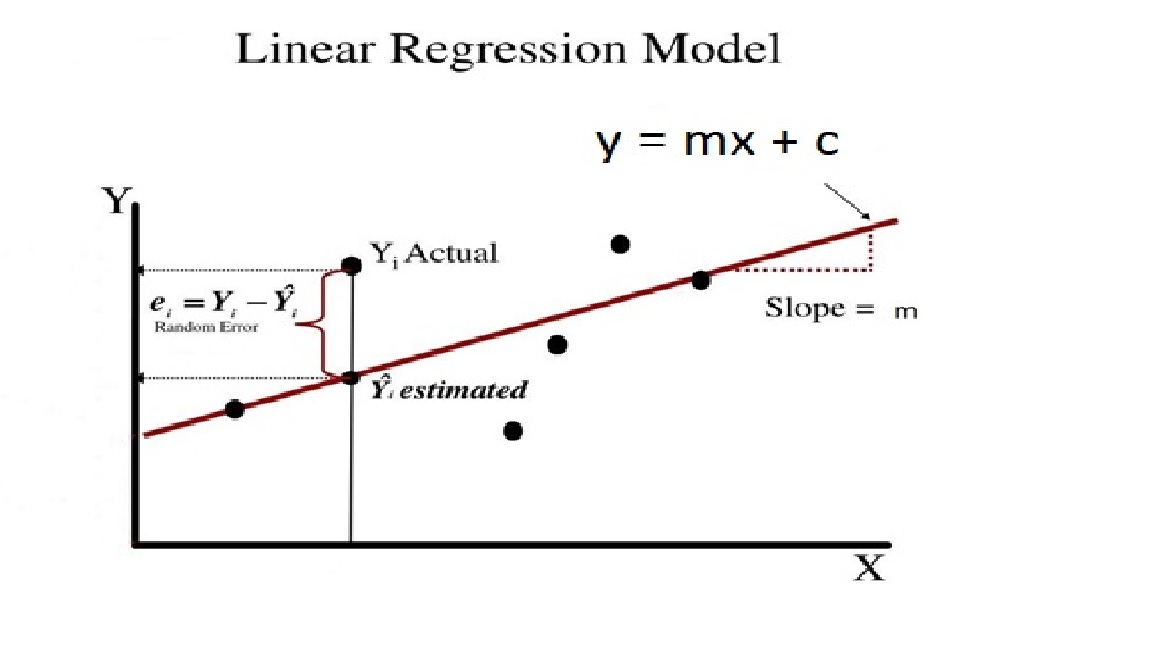
##### Simple Linear Regression: 
- one X variable and one Y variable 
- Formula: **y = mx + c** 
        y is the response or target variable   
        x is the predictor variable
        m is the coefficient of x
        c is the intercept
 

##### Multiple Linear Regression: 
- one Y variable and two or more X variable 
- Formula: **y = m1x1 + m2x2.....+ mnxn** 
        y is the target variable
        x1, x2, x3..xn represents the features.
        m1, m2, m3....mn are the coefficients of each feature ie., x1, x2, x3.. respectively.

### Multicollinearity
- Occurs when two or more independent variables are highly correlated with each other.
- Stronger the correlation, difficult for the model to estimate the relationship between each independent variable and dependent variable independently.

## Cost Function

    - It is a function that signifies how much the predicted values are deviated from the actual values.<br>
    - MSE is the most commonly used cost function for Linear Regression. MSE is average of the sum of squared difference between the predicted and actual value. Output of MSE is the single number representing the cost.

# Gradient Descent

- It is an optimization algorithm used for minimizing the cost function. It's based on a convex function and tweaks its parameters iteratively to minimize a given function to its global minimum. It helps to get optimal value for the slope m which provides the best fit line.<br>
- Our aim is to minimize the error between the predicted values and the actual values.<br>

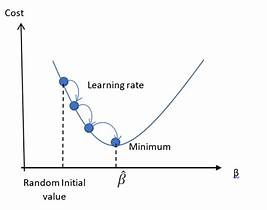


The gradient descent curve has the cost function and slope values. This algorithm intially starts with a randomnly selected m value and from there it uses calculus to iteratively adjust the values of m and calculate cost function for all the slopes. So it takes all the error value and search for minimum error.  Once it finds the m that has minimum error, it creates a best fit line using that m.

For the randomly selected m, it might not result in global minimum. So we need to move down and for that we use convergence theorem


Learning rate should be a small value ranging between 0.1 to 0.0000001.

To find the derivative of slope, we need to draw a tangent from that point. 

If the right-hand side of the tangent is facing towards down then its a negative slope. So the derivative of that slope will also be negative. Hence we need to increase the m value to move towards the global minima.

If the right-hand side of the tangent faces towards the left, then its a positive slope. So the derivative of the slope will be positive. We need to reduce the m value so it will move towards the global minima. 




When it reaches the global minima, that m value is used for creating the best-fit line. This way the algorithm decides the best fit line.

## Linear Regression

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset for our analysis

data = pd.read_csv('hp_data.csv')
print(data.shape)
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hp_data.csv'

In [ ]:
# Summary of the data
data.info()

In [ ]:
# Statistical information of data
data.describe()

In [ ]:
## check for the missing values
data.isnull().sum()

In [ ]:
# Drop the unnamed column in the dataset
data.drop('Unnamed: 0', axis=1, inplace=True)


In [ ]:
data.sale.unique()

In [ ]:
data.head()

In [ ]:
# find the correlation between the features
cor = data.corr()
sns.heatmap(cor)

In [ ]:
# Split x and y such that x will have the input and y will have the output value

X = data.loc[:,['sqft','yearsOld','totalFloor','bhk']]
y = data.price
y = y/100000
X.head()

In [ ]:
y.head()

In [ ]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Trian the model with the given data
model.fit(X,y) 




In [ ]:
# predict the price for the new data 

model.predict([[1600,5,5,3]])   # 1600->sqft, 5->yearsold, 5->totalfloor, 3->bhk

In [ ]:
# predicted value * 100000

Lets split the dataset into training and test data, so that we can use training set for training the model and use test data (unknown data to the model) to predicting the output. Later the predicted value and the actual value (y_test) can be compared to know how well our model has predicted.

In [ ]:
# Splitting the training and test dataset using train_test_split(). 
# 30% of the data from our dataset is taken as test data. 
# Data will be selected on a random basis.

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10, test_size=0.3)

In [ ]:
# Training the model with our training dataset
model.fit(X_train,y_train)

In [ ]:
# Predicting the output for training data
y_p = model.predict(X_train)
y_p

In [ ]:
# Predicting the output for testing data
y_predict = model.predict(X_test)
y_predict

# Evaluation Metrics

It is a measure of how good our model performs.

1. MSE (Mean Squared Error):<br>
   - It is the average of sum of squared difference between the predicted and actual value.<br>
   - MSE penalises the error.<br>
   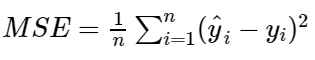

2. RMSE (Root Mean Squared Error):<br>
   - Take root of MSE<br>
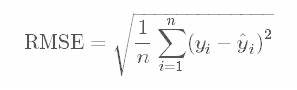

3. MAE (Mean Absolute Error):<br>
   - It is the average of absolute difference between the predicted and the actual value.<br>
   - It does not penalises the error.<br>
    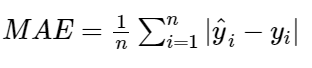

4. R-Squared (Coefficient of Determination):<br>
   - Most important metric to represent the goodness of our model.<br>
   - It is the percentage of variation in dependent variable that a linear model explains.<br>
   <img src="RSquared.PNG" width="300">
    

Residual Sum of squares <img src="RSS.PNG">
Total sum of squares <img src="TSS.PNG">

5. Adjusted  R2  statistics
As we increase the number of independent variables in our equation, the R2 increases as well. But that doesn’t mean that the new independent variables have any correlation with the output variable. In other words, even with the addition of new features in our model, it is not necessary that our model will yield better results but R2 value will increase. To rectify this problem, we use Adjusted R2 value which penalises excessive use of such features which do not correlate with the output data.

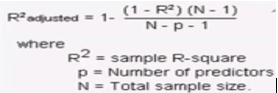

In [ ]:
# Using the evaluation metrics to evaluate the performance of our model. 

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
R2Score =  r2_score(y_test,y_predict)
print("MSE: ", mean_squared_error(y_test, y_predict))
print("MAE: ", mean_absolute_error(y_test, y_predict))
print(R2Score)

In [ ]:
print("MSE for training: ", mean_squared_error(y_train,y_p))
print("MAE for training: ", mean_absolute_error(y_train,y_p))
print("R2Score for training: ", r2_score(y_train,y_p))

In [ ]:
# Calculate the RMSE

import numpy as np
np.sqrt(mean_squared_error(y_test,y_predict))

In [ ]:
# other way to calculate RMSE

from math import sqrt
sqrt(mean_squared_error(y_test, y_predict))

In [ ]:
## Checking adjusted r2 score
train_adjusted_r2 = 1-(1-0.85)*(1050-1)/(1050-4-1)
train_adjusted_r2

In [ ]:
X_train.shape

In [ ]:
X_test.shape

**Assumption of Linear Regression:**<br>
    - Linearity: Linear relationship exist between dependent and independent variable. In case of non-linearity, use transformation such as logarthmic, exponential, square root etc <br>
    - No multicollinearity: If there is multicollinearity its unclear which independent variable explains the dependent variable. <br>
    - Errors are normally distributed. If not, then confidence interval may become too wide or narrow.

**Pros:**<br>
    - Simple method<br>
    - Easy to use and understand<br>
    
**Cons**<br>
    - Very sensitive to outliers : often leads to model with low accuracy<br>
    - It performs well for linearly seperable datasets. So not recommended for most real world applications as it produces simplified results assuming linear relationship between the data.